In [2]:
import pandas as pd
import numpy as np
import csv
import pickle
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy

In [3]:
Path='/home/mgander/Atlantic/data/Viability/'

In [4]:
df = pd.read_pickle(f'{Path}/Synched_aucs.pkl')
df = df[np.isfinite(df['AUC'])].copy()
df['Source'] = df['Source'].astype('category')
df['Cello_drug'] = df['Cello']+'_'+df['PubChem_CID']
df['Cello_drug'] = df['Cello_drug'].astype('category')

In [5]:
D_s_m = {'GDSC1':'GDSC v1', 'GDSC2':'GDSC v2', 'CTD2':'CTRP v2', 'CTPR':'CTRP v1', 'MR_NCI60':'NCI_60', 'PRISM2':'PRISM2', 'DTP':'DTP'}

In [6]:
sources = sorted(set(df['Source']))
sources2 = [D_s_m[a] for a in sources]
sources2

['CTRP v2', 'CTRP v1', 'DTP', 'GDSC v1', 'GDSC v2', 'NCI_60', 'PRISM2']

In [7]:
Zp = np.full((len(sources), len(sources)), np.NaN)
Zs = np.full((len(sources), len(sources)), np.NaN)

for i,s0 in tqdm(enumerate(sources)):
    dfs0 = df[df['Source']==s0].copy()
    for j,s1 in enumerate(sources):
        dfs1 = df[df['Source']==s1].copy()
        intersecting = sorted(set(dfs0['Cello_drug'])&set(dfs1['Cello_drug']))

        dfss0 = dfs0[dfs0['Cello_drug'].isin(intersecting)].copy()
        dfss0.index= dfss0['Cello_drug']
        dfss1 = dfs1[dfs1['Cello_drug'].isin(intersecting)].copy()
        dfss1.index= dfss1['Cello_drug']
        dfss1 = dfss1.loc[dfss0.index]
        
        aucs0 = dfss0['AUC']
        aucs1 = dfss1['AUC']

        Zp[i,j]=scipy.stats.pearsonr(aucs0, aucs1).statistic
        Zs[i,j]=scipy.stats.spearmanr(aucs0, aucs1).statistic

7it [00:24,  3.51s/it]


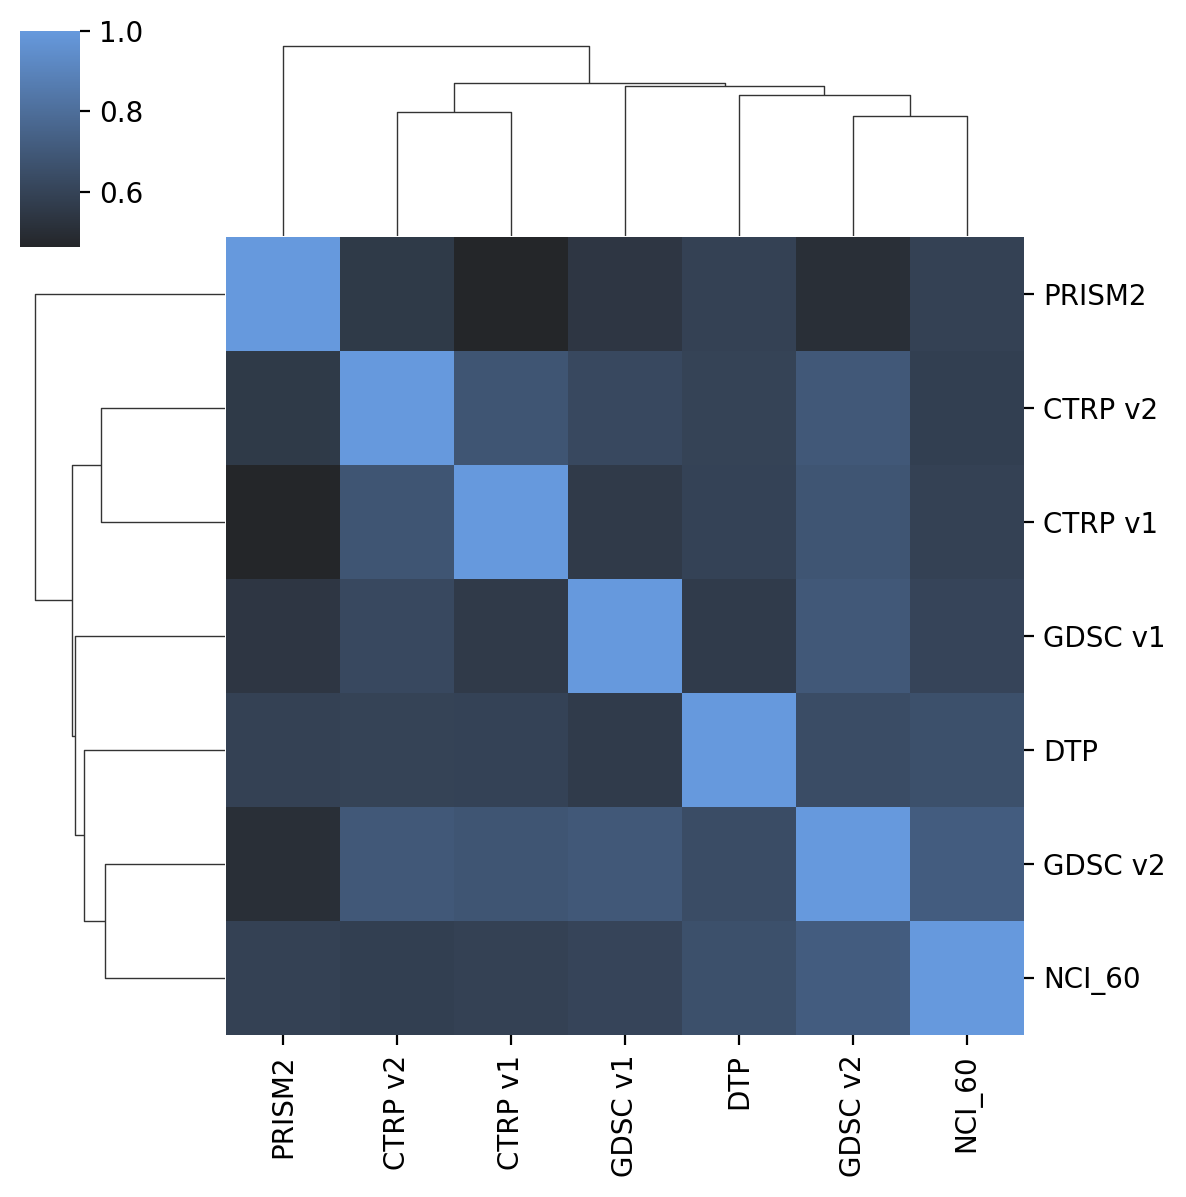

In [11]:
cmap = sns.dark_palette("#69d", reverse=False, as_cmap=True)
plt.rcParams['figure.dpi'] = 200
Zp = pd.DataFrame(data=Zp, columns=sources2, index=sources2)
sns.clustermap(Zp, figsize=(6,6), cmap=cmap)

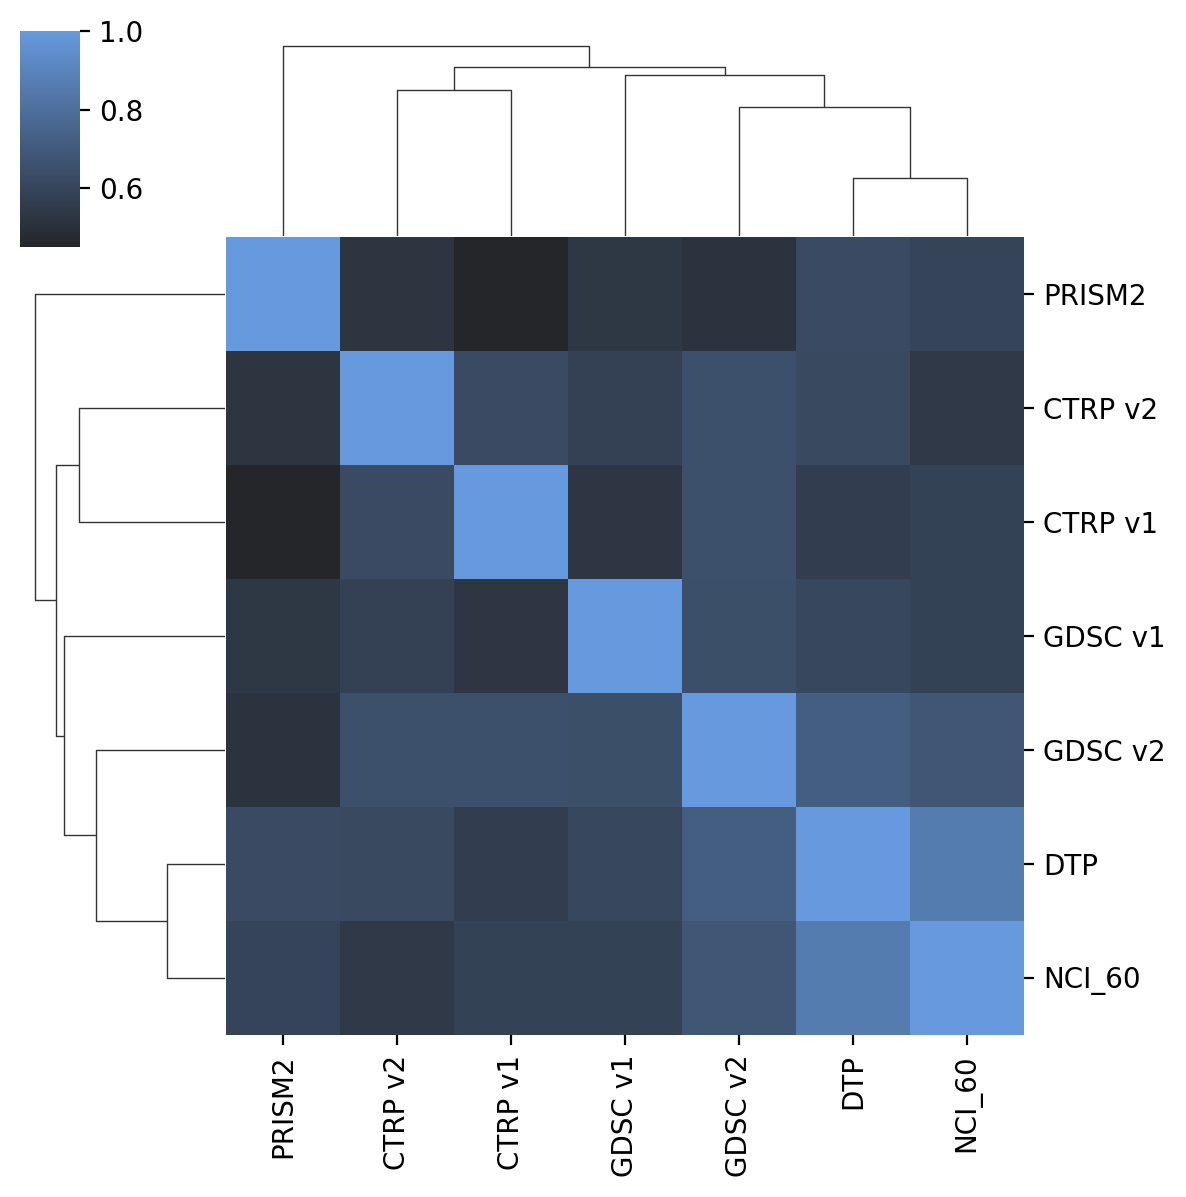

In [12]:
cmap = sns.dark_palette("#69d", reverse=False, as_cmap=True)
plt.rcParams['figure.dpi'] = 200
Zs = pd.DataFrame(data=Zs, columns=sources2, index=sources2)
sns.clustermap(Zs, figsize=(6,6),  cmap=cmap)